In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections as cl
from datetime import datetime
%matplotlib inline

In [5]:
df = pd.read_csv('./survey_results_public.csv')

In [ ]:
df.describe()

In [19]:
#'Quesion1'   Find the average age of developers when they wrote their first line of code.
df = pd.read_csv('./survey_results_public.csv')

df["Age1stCode"].replace({"Younger than 5 years": "5","Older than 85": "85"}, inplace=True)
dev = df[df.MainBranch.str.contains("developer", na=False)]
xyz = pd.to_numeric(dev['Age1stCode'])
xyz.mean()

15.393174052214313

In [20]:
# Quesion 2 Deduce the percentage of developers who know python in each country
df = pd.read_csv('./survey_results_public.csv')

dev = df[df.MainBranch.str.contains("developer", na=False)]
pythonistas = dev[dev.LanguageWorkedWith.str.contains("Python", na=False)]
xyz = pythonistas['Country'].value_counts()
print(xyz)

United States             8541
India                     2179
United Kingdom            1955
Germany                   1943
Canada                    1258
                          ... 
Namibia                      1
Libyan Arab Jamahiriya       1
Togo                         1
Lesotho                      1
Botswana                     1
Name: Country, Length: 157, dtype: int64


In [9]:
# Quesion 3 Generate a report for the average salary of developer based on continent.
import pandas as pd
df = pd.read_csv('./survey_results_public.csv')
salary_describe = (df.loc[df['Country'].isin(['India', 'United States', 'Germany', 'United Kingdom'])]
                   .groupby('Country')['ConvertedComp'].describe())
salary_describe.loc['World', :] = df['ConvertedComp'].describe()
salary_describe.columns.name = 'Salary description'
salary_describe.loc[['World', 'India', 'United States', 'United Kingdom', 'Germany'], 
                    ['count', 'mean', '25%', '50%', '75%']]


Salary description,count,mean,25%,50%,75%
Country,,,,,
World,55823.0,127110.738423,25777.5,57287.0,100000.00
India,3999.0,28057.664916,5040.0,10080.0,20989.00
United States,14981.0,249546.254589,80000.0,110000.0,160000.00
United Kingdom,4034.0,166182.499504,45797.0,68041.0,117763.00
Germany,3778.0,109256.884066,45830.0,63016.0,81588.75


In [ ]:
num = df['Country'].value_counts()
total = df.groupby('Country')['ConvertedComp'].sum()
df_plot1 = (total/num).sort_values(ascending=False)
df_plot = df_plot1.reset_index()
df_plot.rename(columns={0:'Average income in USD','index':'Country'},inplace=True)
sns.barplot(y='Country',x='Average income in USD',df = df_plot)


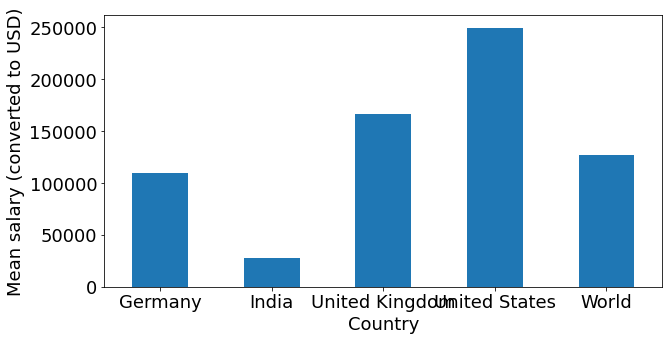

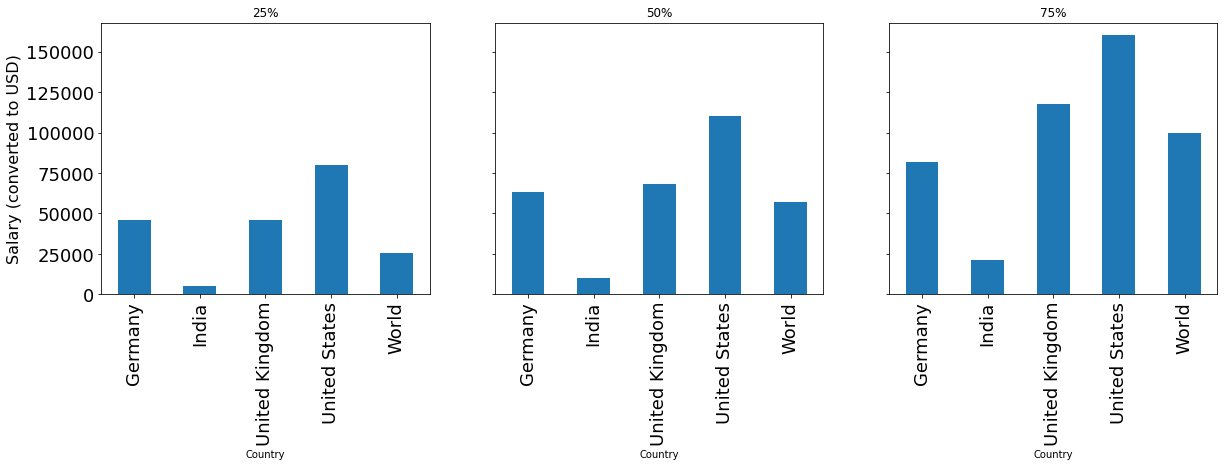

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5));
salary_describe['mean'].plot.bar(ax=ax);
ax.set_ylabel("Mean salary (converted to USD)", fontdict={'size':18});
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_xlabel("Country", fontdict={'size': 18});
ax.tick_params(axis='both', labelsize=18);

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey=True)
for ax_id, percentile in zip([0, 1, 2], ['25%', '50%', '75%']):
    salary_describe[percentile].plot.bar(ax=axes[ax_id])
    axes[ax_id].set_title(percentile)
axes[0].set_ylabel("Salary (converted to USD)", fontdict={'size': 16});
for ax in axes:
    ax.tick_params(axis='both', labelsize=18);

In [2]:
# Question 4 What is the distribution of people who code as a hobby based on gender and continent?
import pandas as pd
df = pd.read_csv('./survey_results_public.csv')
total = df.groupby('Country')['Gender']
total.value_counts()
xyz = df.groupby('Hobbyist')['Gender']
xyz.value_counts()

Hobbyist  Gender                                                     
No        Man                                                            14300
          Woman                                                           2318
          Non-binary, genderqueer, or gender non-conforming                119
          Woman;Non-binary, genderqueer, or gender non-conforming           32
          Man;Non-binary, genderqueer, or gender non-conforming             28
          Woman;Man                                                         22
          Woman;Man;Non-binary, genderqueer, or gender non-conforming       15
Yes       Man                                                            63619
          Woman                                                           4026
          Non-binary, genderqueer, or gender non-conforming                478
          Man;Non-binary, genderqueer, or gender non-conforming            153
          Woman;Non-binary, genderqueer, or gender non-confor

In [13]:
# Quesion 5 Generate the report for job and career satisfaction of developer based on their gender and continent?

df["Gender"].replace({"Man": "Male","Man;Non-binary, genderqueer, or gender non-conforming": "Male","Woman": "Female","Woman;Non-binary, genderqueer, or gender non-conforming": "Female","Woman;Man;Non-binary, genderqueer, or gender non-conforming": "Other"," Non-binary, genderqueer, or gender non-conforming" : "Other","Woman;Man" : "Other","Non-binary, genderqueer, or gender non-conforming" : "Other"}, inplace=True)
df['Gender'].value_counts()

Male      78100
Female     6507
Other       799
Name: Gender, dtype: int64

In [3]:
dev = df[df.MainBranch.str.contains("developer", na=False)]
pythonistas = dev[dev.CareerSat.str.contains("satisfied", na=False)]
#xyz = pythonistas['Country'].value_counts()
xyz = pythonistas.groupby('Gender')['Country']
xyz.value_counts()

Gender                                                   Country       
Man                                                      United States     15313
                                                         India              6116
                                                         United Kingdom     4381
                                                         Germany            4349
                                                         Canada             2409
                                                                           ...  
Woman;Non-binary, genderqueer, or gender non-conforming  Nigeria               1
                                                         Poland                1
                                                         Portugal              1
                                                         Spain                 1
                                                         Uruguay               1
Name: Country, Length: 468, dtype: in

In [4]:
dev = df[df.MainBranch.str.contains("developer", na=False)]
pythonistas = dev[dev.CareerSat.str.contains("dissatisfied", na=False)]
#xyz = pythonistas['Country'].value_counts()
xyz = pythonistas.groupby('Gender')['Country']
xyz.value_counts()

Gender                                                   Country           
Man                                                      United States         2583
                                                         India                 2126
                                                         Germany               1075
                                                         United Kingdom         896
                                                         Brazil                 515
                                                                               ... 
Woman;Non-binary, genderqueer, or gender non-conforming  New Zealand              1
                                                         Nigeria                  1
                                                         Poland                   1
                                                         Russian Federation       1
                                                         United Kingdom           1


In [5]:
dev = df[df.MainBranch.str.contains("developer", na=False)]
pythonistas = dev[dev.JobSat.str.contains("satisfied", na=False)]
#xyz = pythonistas['Country'].value_counts()
xyz = pythonistas.groupby('Gender')['Country']
xyz.value_counts()


Gender                                                   Country       
Man                                                      United States     15025
                                                         India              5960
                                                         United Kingdom     4332
                                                         Germany            4292
                                                         Canada             2353
                                                                           ...  
Woman;Non-binary, genderqueer, or gender non-conforming  Mexico                1
                                                         Poland                1
                                                         Portugal              1
                                                         Spain                 1
                                                         Uruguay               1
Name: Country, Length: 455, dtype: in

In [6]:
dev = df[df.MainBranch.str.contains("developer", na=False)]
pythonistas = dev[dev.JobSat.str.contains("dissatisfied", na=False)]
#xyz = pythonistas['Country'].value_counts()
xyz = pythonistas.groupby('Gender')['Country']
xyz.value_counts()

Gender                                                   Country       
Man                                                      United States     4090
                                                         India             2659
                                                         Germany           1367
                                                         United Kingdom    1331
                                                         Canada             649
                                                                           ... 
Woman;Non-binary, genderqueer, or gender non-conforming  Brazil               1
                                                         Egypt                1
                                                         France               1
                                                         Poland               1
                                                         Sweden               1
Name: Country, Length: 365, dtype: int64

In [17]:
# Quesion 6 For problems f and g, gender should have three categories man, woman and others. If a record have any other value, consider it as Others.

df['Gender'].value_counts()

Male      78100
Female     6507
Other       799
Name: Gender, dtype: int64

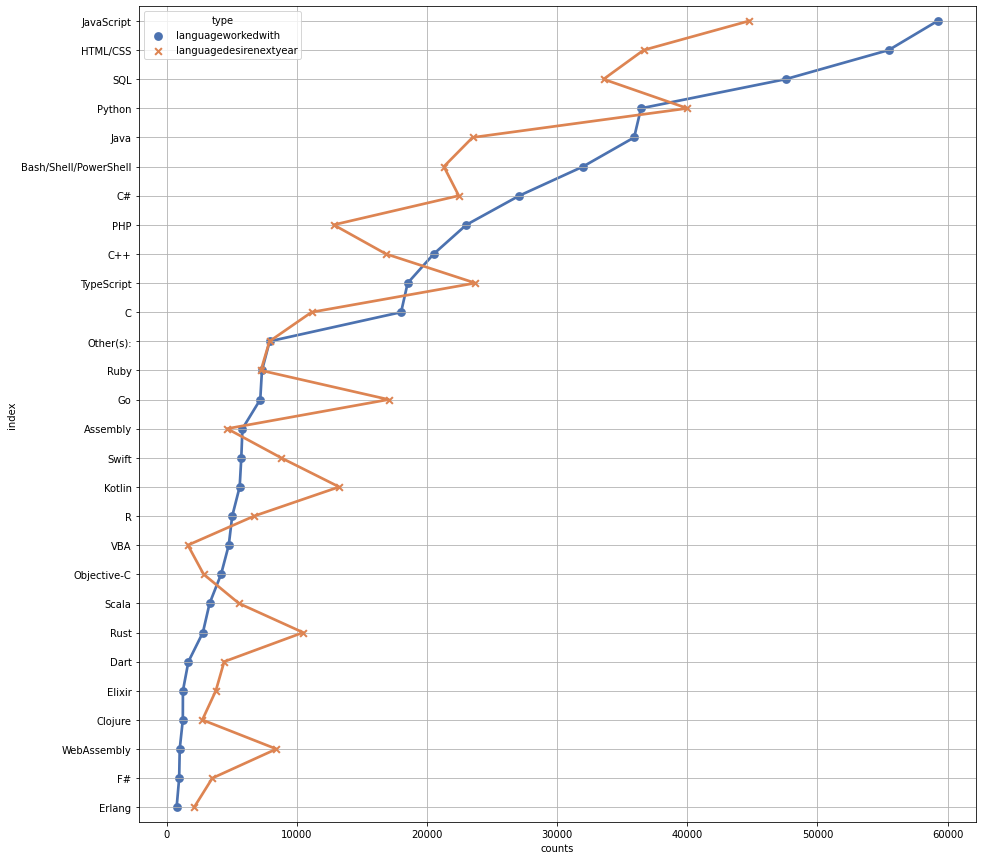

In [10]:
# Quesion 7 Based on this survey, what will be the most desired programming language for the year 2020?
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./survey_results_public.csv')
data1 = df['LanguageWorkedWith'].str.split(';',expand = True).stack().reset_index()[0].value_counts().reset_index()
data1['type'] = 'languageworkedwith'
data2 = df['LanguageDesireNextYear'].str.split(';',expand = True).stack().reset_index()[0].value_counts().reset_index()
data2['type']  = 'languagedesirenextyear'
data = pd.concat([data1,data2],axis = 0)

data.rename(columns = {0:'counts'},inplace = True)
sns.pointplot(y='index', x= 'counts', data =data,hue = 'type',join=True, markers=["o", "x"],palette="deep")
plt.grid(True,alpha=1)
g = plt.gcf()
g.set_size_inches(15,15)